In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('garments_worker_productivity.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Подготовка данных

In [29]:
# просмотрим тип объектов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [30]:
# заменяем object на int
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
columns = ["date", "quarter", "department", "day"]
for column in columns:
    df[column] = lab.fit_transform(df[column])

df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,0,1,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0,0,0,3,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,0,0,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,0,1,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,0,1,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,51,1,0,5,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,51,1,0,5,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,51,1,0,5,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,51,1,0,5,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [31]:
# некоторые значения 'wip' равны nill
# просмотрим какие значения принимает этот параметр
df['wip'].describe()

count      691.000000
mean      1190.465991
std       1837.455001
min          7.000000
25%        774.500000
50%       1039.000000
75%       1252.500000
max      23122.000000
Name: wip, dtype: float64

In [32]:
# и заменим nill

df['wip'] = df['wip'].fillna(1252.5)

In [33]:
# нормализация некоторых признаков

from sklearn import preprocessing

part_df = df[['smv', 'wip', 'over_time']]
norm_arr = preprocessing.normalize(part_df)

df[['smv', 'wip', 'over_time']] = pd.DataFrame(norm_arr, columns=['smv', 'wip', 'over_time'])

<AxesSubplot:>

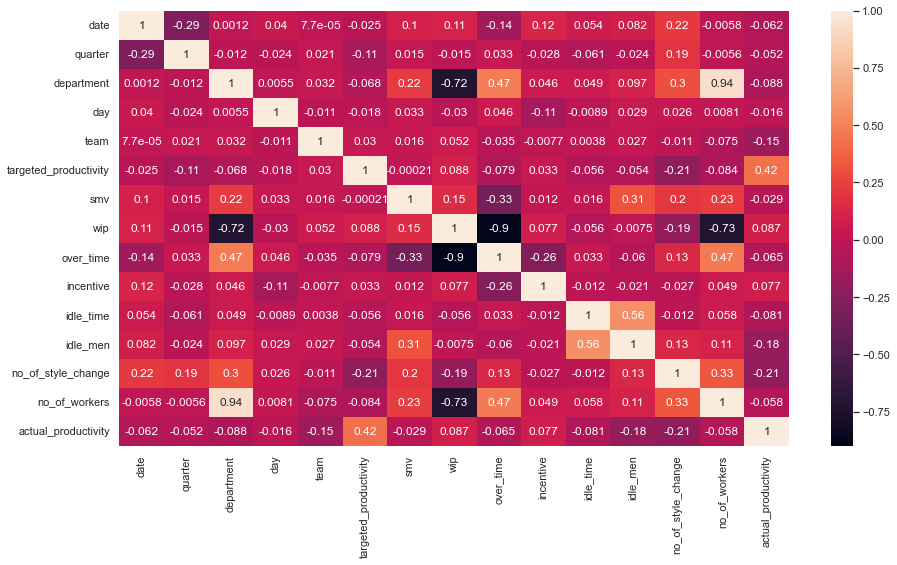

In [34]:
# проверим зависимости целевого признака от других

corr_matrix = df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_matrix, annot=True)

<AxesSubplot:>

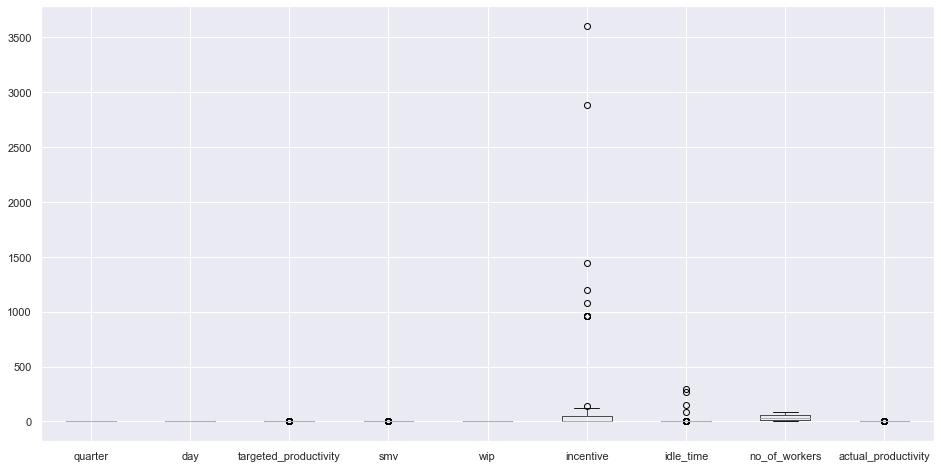

In [35]:
# проверим данные на наличие выбросов
df.boxplot(['quarter','day','targeted_productivity','smv','wip','incentive','idle_time','no_of_workers','actual_productivity'], figsize = (16, 8))

<AxesSubplot:>

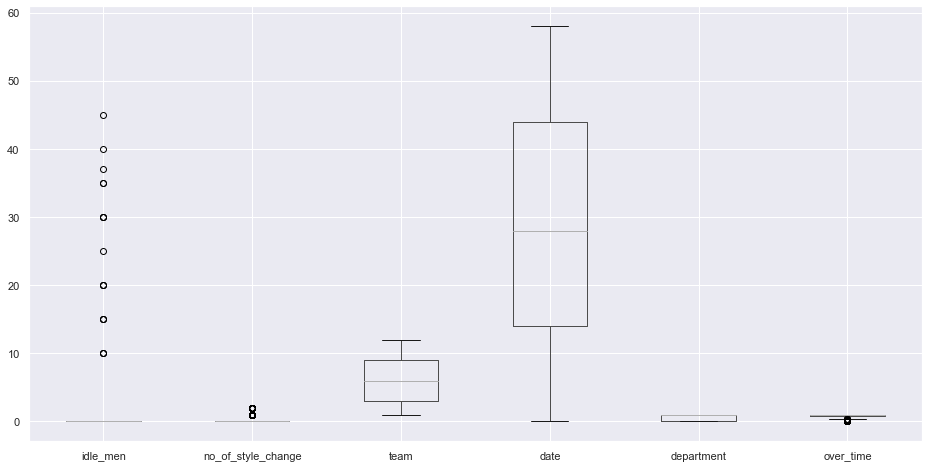

In [36]:
df.boxplot(['idle_men', 'no_of_style_change', 'team', 'date', 'department', 'over_time'], figsize = (16, 8))

In [37]:
columns_check = ['incentive']

for column in columns_check:
       for x in [column]:
              q75,q25 = np.percentile(df.loc[:,x],[75,25])
              dif = q75-q25

              max = q75 + (1.5 * dif)
              min = q25 - (1.5 * dif)

              df.loc[df[x] < min, x] = np.nan
              df.loc[df[x] > max, x] = np.nan
    
df.isnull().sum()

date                      0
quarter                   0
department                0
day                       0
team                      0
targeted_productivity     0
smv                       0
wip                       0
over_time                 0
incentive                11
idle_time                 0
idle_men                  0
no_of_style_change        0
no_of_workers             0
actual_productivity       0
dtype: int64

In [38]:
df = df.dropna(axis = 0)
df.isnull().sum().to_frame(name="nans").query("nans > 0")["nans"]

Series([], Name: nans, dtype: int64)

In [39]:
data = df.iloc[:,:-1]               # выделяем признаки
target = df.iloc[:, -1].values      # выделяем целевой признак

In [40]:
target

array([0.94072542, 0.8865    , 0.80057049, ..., 0.625625  , 0.50588889,
       0.39472222])

In [41]:
# разделяем выборку на тренироваочную и тестувую
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1)

In [42]:
x_train

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
860,35,2,1,3,7,0.75,0.067638,0.997710,0.000000,0.0,5.0,20,1,59.0
195,3,1,0,0,3,0.80,0.001892,0.571164,0.820834,0.0,0.0,0,0,10.0
203,3,1,0,0,5,0.65,0.002174,0.656274,0.754519,0.0,0.0,0,0,8.0
41,21,0,0,2,9,0.80,0.002497,0.793680,0.608330,0.0,0.0,0,0,8.0
338,10,2,1,4,6,0.80,0.002010,0.184416,0.982846,63.0,0.0,0,0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,19,0,1,1,2,0.75,0.002980,0.141589,0.989921,45.0,0.0,0,0,55.0
664,47,1,1,2,12,0.80,0.004991,0.335586,0.941996,63.0,0.0,0,0,34.0
745,29,1,1,3,9,0.80,0.004184,0.002011,0.999989,0.0,0.0,0,0,58.0
142,25,1,0,3,8,0.80,0.001520,0.656275,0.754520,0.0,0.0,0,0,8.0


In [43]:
y_train

array([0.61114054, 0.90545454, 0.80956439, ..., 0.49788506, 0.73598485,
       1.00023041])

In [44]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, input_shape=(14,), name='hidden_layer_1'),
  tf.keras.layers.Dense(30, activation='sigmoid', name='hidden_layer_2'),
  tf.keras.layers.Dense(20, activation='tanh', name='hidden_layer_3'),
  tf.keras.layers.Dense(10, activation='tanh', name='hidden_layer_4'),
  tf.keras.layers.Dense(4, activation='sigmoid', name='hidden_layer_5'),
  tf.keras.layers.Dense(1, activation='tanh', name='output')
])

In [45]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.1, momentum=0.9)

model.compile(
    loss='mse',   # Функция потерь
    optimizer=sgd,
    metrics=['mean_absolute_error']
)

In [46]:
model.fit(
    x_train,                # набор входных данных
    y_train,                # набор правильных ответов
    validation_split=0.2,   # валидационные данные
    epochs=15,              # кол-во эпох
    batch_size = 8          # кол-во элементов в пакете
)

Epoch 1/15
107/107 [==============================] - 1s 8ms/step - loss: 0.0405 - mean_absolute_error: 0.1521 - val_loss: 0.0260 - val_mean_absolute_error: 0.1226
Epoch 2/15
107/107 [==============================] - 0s 3ms/step - loss: 0.0279 - mean_absolute_error: 0.1271 - val_loss: 0.0241 - val_mean_absolute_error: 0.1102
Epoch 3/15
107/107 [==============================] - 1s 5ms/step - loss: 0.0258 - mean_absolute_error: 0.1227 - val_loss: 0.0232 - val_mean_absolute_error: 0.1106
Epoch 4/15
107/107 [==============================] - 0s 4ms/step - loss: 0.0228 - mean_absolute_error: 0.1132 - val_loss: 0.0229 - val_mean_absolute_error: 0.1123
Epoch 5/15
107/107 [==============================] - 0s 3ms/step - loss: 0.0238 - mean_absolute_error: 0.1151 - val_loss: 0.0218 - val_mean_absolute_error: 0.1067
Epoch 6/15
107/107 [==============================] - 0s 3ms/step - loss: 0.0226 - mean_absolute_error: 0.1111 - val_loss: 0.0240 - val_mean_absolute_error: 0.1132
Epoch 7/15
107/1

In [47]:
# Если ошибка не уменьшается на протяжении указанного количества эпох,
# то процесс обучения прерывается и модель инициализируется весами 
#с самым низким показателем параметра "monitor"
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', # указывается параметр, 
    #по которому осуществляется ранняя остановка. 
    #Обычно это функция потреть на валидационном наборе (val_loss)
    patience=2, # количество эпох по истечении которых закончится обучение, 
    #если показатели не улучшатся
    mode='min', # указывает, в какую сторону должна быть улучшена ошибка
    restore_best_weights=True # если параметр установлен в true, 
    #то по окончании обучения модель будет инициализирована весами 
    #с самым низким показателем параметра "monitor"
)

# Сохраняет модель для дальнейшей загрузки
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='my_model', # путь к папке, где будет сохранена модель
    monitor='val_loss',
    save_best_only=True, # если параметр установлен в true, 
    #то сохраняется только лучшая модель
    mode='min'
)

# Сохраняет логи выполнения обучения, 
#которые можно будет посмотреть в специальной среде TensorBoard
tensorboard = tf.keras.callbacks.TensorBoard(
    log_dir='log', # путь к папке где будут сохранены логи
)

In [48]:
model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size = 8,
    callbacks = [
        early_stopping,
        model_checkpoint,
        tensorboard
    ]
)

Epoch 1/50
107/107 [==============================] - 1s 10ms/step - loss: 0.0212 - mean_absolute_error: 0.1088 - val_loss: 0.0226 - val_mean_absolute_error: 0.1095
INFO:tensorflow:Assets written to: my_model\assets
Epoch 2/50
107/107 [==============================] - 0s 4ms/step - loss: 0.0210 - mean_absolute_error: 0.1070 - val_loss: 0.0221 - val_mean_absolute_error: 0.1034
INFO:tensorflow:Assets written to: my_model\assets
Epoch 3/50
107/107 [==============================] - 0s 3ms/step - loss: 0.0216 - mean_absolute_error: 0.1090 - val_loss: 0.0221 - val_mean_absolute_error: 0.1076
INFO:tensorflow:Assets written to: my_model\assets
Epoch 4/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0201 - mean_absolute_error: 0.1038 - val_loss: 0.0213 - val_mean_absolute_error: 0.1031
INFO:tensorflow:Assets written to: my_model\assets
Epoch 5/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0200 - mean_absolute_error: 0.1038 - val_loss: 0.0207 - val_mea

Оценка модели

In [49]:
res = model.evaluate(x_test, y_test)
print("loss and mean_absolute_error", res)

4/4 [==============================] - 0s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.1060
loss and mean_absolute_error [0.020206473767757416, 0.10595756769180298]


In [50]:
predictions = model.predict(x_test)

print('y_test', '\t', '\t', '\t', 'predictions')
for i in range(len(predictions)):
    print (y_test[i],'\t', '\t',predictions[i][0])

y_test 	 	 	 predictions
1.108125 	 	 0.83605015
0.899 	 	 0.87184536
0.578314394 	 	 0.85542774
1.000230409 	 	 0.87601376
0.24625 	 	 0.6818635
0.800125 	 	 0.6882053
0.5403125 	 	 0.8104141
1.000065789 	 	 0.8868002
0.7999632179999999 	 	 0.7727985
0.49998033399999997 	 	 0.5246702
1.000230409 	 	 0.88682616
0.64998056 	 	 0.76572806
0.900129762 	 	 0.8848735
0.5356779660000001 	 	 0.5425902
0.892194444 	 	 0.84273463
0.890604167 	 	 0.8232166
0.8133712120000001 	 	 0.8184752
0.500528095 	 	 0.698706
0.899166667 	 	 0.8455032
0.9456 	 	 0.8475853
0.672140805 	 	 0.5512153
0.955151515 	 	 0.7460042
0.80062987 	 	 0.8713521
0.750347333 	 	 0.7685748
0.687555556 	 	 0.696447
0.845833333 	 	 0.70708525
0.603432184 	 	 0.5752582
0.6503071429999999 	 	 0.53915447
0.618361111 	 	 0.8498485
0.8002467529999999 	 	 0.83704907
0.800071839 	 	 0.8120665
0.895454545 	 	 0.87734216
0.672135417 	 	 0.68489414
0.800128721 	 	 0.6578097
0.98719697 	 	 0.886364
0.900135693 	 	 0.8858909
1.000230409 	

Нейронная сеть

In [51]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)


print('y_test', '\t', '\t', '\t', 'predictions')
for i in range(len(y_pred)):
    print (y_test[i],'\t', '\t', '\t',y_pred[i])

y_test 	 	 	 predictions
1.108125 	 	 	 0.7921116204067089
0.899 	 	 	 0.636527814180938
0.578314394 	 	 	 0.779843671214065
1.000230409 	 	 	 1.014847487823952
0.24625 	 	 	 0.7864258862311659
0.800125 	 	 	 0.7524140462036613
0.5403125 	 	 	 0.6496340952163875
1.000065789 	 	 	 0.9857569371504646
0.7999632179999999 	 	 	 0.7669515891799249
0.49998033399999997 	 	 	 0.5536152928463766
1.000230409 	 	 	 1.0227639309490337
0.64998056 	 	 	 0.6778884981050397
0.900129762 	 	 	 0.9029801629580467
0.5356779660000001 	 	 	 0.5397309044455618
0.892194444 	 	 	 0.7536018253881447
0.890604167 	 	 	 0.768598672890099
0.8133712120000001 	 	 	 0.8048197692831691
0.500528095 	 	 	 0.48418164825409427
0.899166667 	 	 	 0.7832349350095691
0.9456 	 	 	 0.7732764329488899
0.672140805 	 	 	 0.5647449037402242
0.955151515 	 	 	 0.8223296583355901
0.80062987 	 	 	 0.8060351363045986
0.750347333 	 	 	 0.7076942104938004
0.687555556 	 	 	 0.7545158499193081
0.845833333 	 	 	 0.7582220176077406
0.603432184 

In [52]:
from sklearn.metrics import mean_absolute_error


mean_absolute_error(y_test, y_pred)

0.10059423534491188